# NLP Fake News Prediction Project

## Add dependacies

In [1]:
import pandas as pd

## Import data
Here I import the data, label it and do some basic analysis to undersand the data before diving deeper.

In [10]:
import pandas as pd

# Load the training data
data = pd.read_csv('dataset/training_data.csv', sep='\t', header=None, names=['label', 'text'])

# Inspect the first few rows of the data
print("Data Head:")
print(data.head())

# Check for any missing values
print("Missing Values in Data:")
print(data.isnull().sum())

# Display basic statistics for data
print("Data Statistics:")
print(data.describe())

print("Label Distribution:")
print(data['label'].value_counts())

Data Head:
   label                                               text
0      0  donald trump sends out embarrassing new year‚s...
1      0  drunk bragging trump staffer started russian c...
2      0  sheriff david clarke becomes an internet joke ...
3      0  trump is so obsessed he even has obama‚s name ...
4      0  pope francis just called out donald trump duri...
Missing Values in Data:
label    0
text     0
dtype: int64
Data Statistics:
              label
count  34152.000000
mean       0.485477
std        0.499796
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Label Distribution:
label
0    17572
1    16580
Name: count, dtype: int64


# Data visialization
let's visualize the date to understanded better

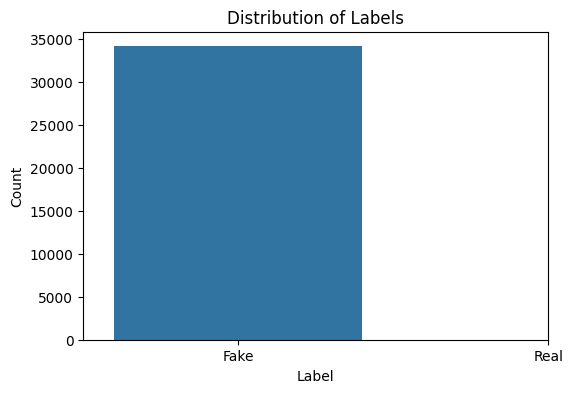

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of labels
plt.figure(figsize=(6, 4))
sns.countplot(data['label'])
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.show()


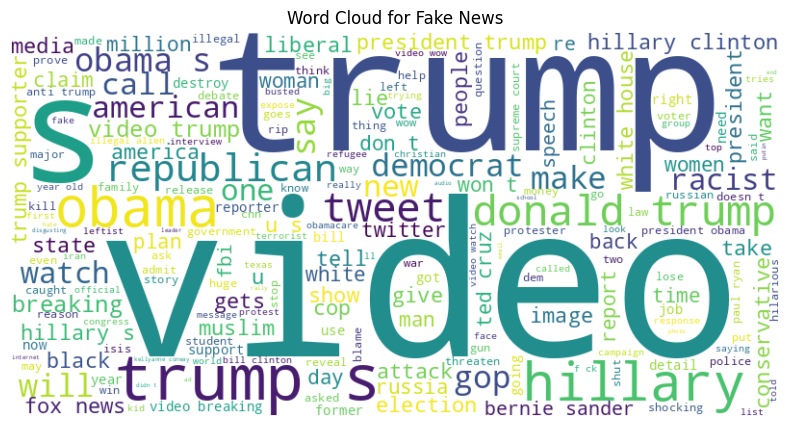

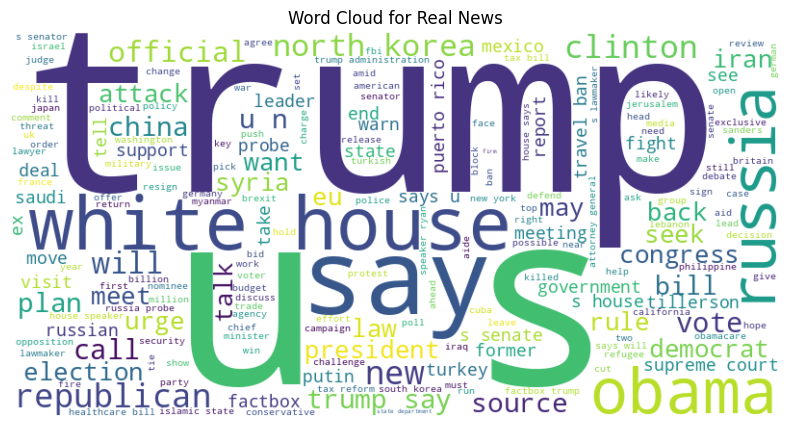

In [16]:
from wordcloud import WordCloud

# Generate word clouds
fake_text = ' '.join(data[data['label'] == 0]['text'])
real_text = ' '.join(data[data['label'] == 1]['text'])

# Word cloud for fake news
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake News')
plt.show()

# Word cloud for real news
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Real News')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


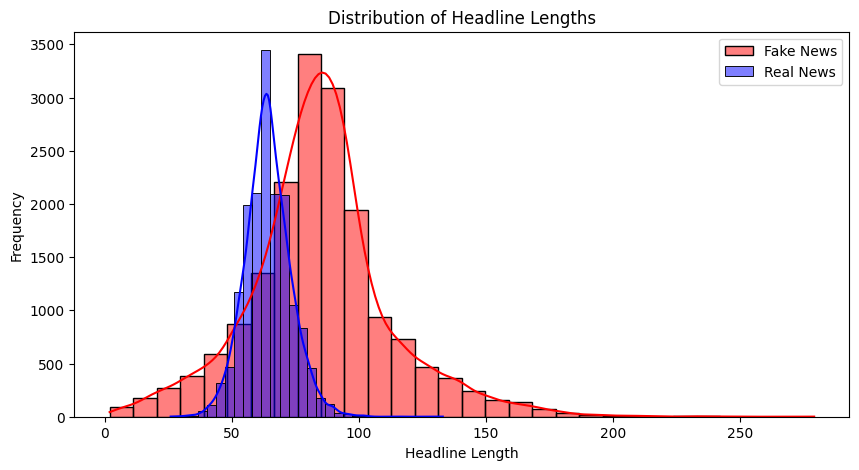

In [17]:
# Calculate headline lengths
data['headline_length'] = data['text'].apply(len)

# Plot the distribution of headline lengths
plt.figure(figsize=(10, 5))
sns.histplot(data[data['label'] == 0]['headline_length'], bins=30, kde=True, color='red', label='Fake News')
sns.histplot(data[data['label'] == 1]['headline_length'], bins=30, kde=True, color='blue', label='Real News')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [18]:
from collections import Counter
import itertools

# Function to get most common words
def get_most_common_words(text, num_words=20):
    words = list(itertools.chain(*[headline.split() for headline in text]))
    counter = Counter(words)
    return counter.most_common(num_words)

# Get most common words in fake news
fake_common_words = get_most_common_words(data[data['label'] == 0]['text'])
real_common_words = get_most_common_words(data[data['label'] == 1]['text'])

print("Most Common Words in Fake News:")
print(fake_common_words)

print("\nMost Common Words in Real News:")
print(real_common_words)


Most Common Words in Fake News:
[('to', 6461), ('trump', 5540), ('the', 4278), ('for', 3424), ('of', 3365), ('[video]', 3040), ('in', 2944), ('a', 2522), ('on', 2486), ('and', 2115), ('is', 1959), ('(video)', 1927), ('with', 1628), ('his', 1281), ('about', 1249), ('trump‚s', 1230), ('just', 1229), ('obama', 1224), ('after', 1119), ('hillary', 1103)]

Most Common Words in Real News:
[('to', 6117), ('trump', 4417), ('u.s.', 3481), ('in', 3288), ('on', 2692), ('says', 2263), ('of', 2204), ('for', 2191), ('house', 1365), ('with', 1162), ('as', 837), ('white', 779), ('over', 756), ('senate', 715), ('after', 710), ('at', 666), ('new', 650), ("trump's", 646), ('russia', 631), ('not', 628)]


## Add headline length as a column 
looks like there is some correlation between healine lenght and classification, so let's add headline as a feature

In [ ]:
# Calculate headline lengths
data['headline_length'] = data['text'].apply(len)

# Display the first few rows to confirm the new feature
print(data[['text', 'headline_length']].head())
